In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib import style
style.use("ggplot")
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from scipy.spatial.distance import cdist
from sklearn.metrics import confusion_matrix
from sklearn import mixture 

In [61]:
rowDates = []
rowValues = []
counter = 0

#dataDF = pd.read_csv('CW PUMP 1B CURRENT.csv', sep=',', header=None)  
dataDF = pd.read_csv('ID FAN 1B MTR OBRG TEMP.csv', sep=',', header=None)   # outlier > 90 and < 10
#dataDF = pd.read_csv('temperator.csv', sep=',', header=None)                # outlier > 100 and < 0  outlierRange = [100, 0]
#dataDF = pd.read_csv('drehzahl.csv', sep=',', header=None)                   
#dataDF = pd.read_csv('Durchflussmessung(ls).csv', sep=',', header=None)                   
#dataDF = pd.read_csv('Wirkleistung(MW)).csv', sep=',', header=None)                   
#dataDF = pd.read_csv('NspPrressure.csv', sep=',', header=None)                   

#dataDF = pd.read_csv('9-1-2008 to 9-1-2009 Trend.csv', sep=',', header=None)  

for index, row in dataDF.iterrows():
    rowValue = row[1]
    rowDate = row[0]
        
    try:
        float(rowValue)
        pd.to_datetime(rowDate)
        rowValues.append(float(rowValue))
        rowDates.append(pd.to_datetime(rowDate))

    except:
        counter += 1
        continue
    
    if index == 2000:
        break

print('values :',len(rowValues))
print('dates :',len(rowDates))
print('invalid :',counter)

#print(rowDates)

values : 2001
dates : 2001
invalid : 0


In [25]:
def optimalFound(deltas, k):
    found = 0

    for idx in range(1,len(deltas)):       
        if(deltas[idx] < deltas[idx-1]):
            found = True
            return found
            break
        else:
            continue

In [26]:
def createAnomalyList(values, interval):
    counterNew = 0
    outlier = []
    for v in values:
        if (v < interval[0] or v > interval[1]):
            #print(v)
            outlier.append(1)
            counterNew = counterNew + 1
        else:
            outlier.append(0)
    print("anomalie :", counterNew)
    return outlier

In [27]:
def movingaverage (values, dates , window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    window = window - 1
    newlist = dates[window:]
    return sma, newlist

In [28]:
def calculateDelta(values, dates):
    deltaDates = dates.copy()
    del deltaDates[0]
    delta = []
    posDelta = []

    for idx in range(1, len(values)):
        x = values[idx] - values[idx - 1]
        delta.append(x)
        if(x < 0):
            posDelta.append(-1*x)
        else:
            posDelta.append(x)
            
    print("delta Values: ", len(delta))
    print("pos delta Values: ", len(posDelta))
    print("delta Dates: ", len(deltaDates))

    return delta, posDelta, deltaDates

In [29]:
def plotTheclusteredData(dates, values, labels):
    fig, (ax1) = plt.subplots(1, figsize=(14,6))
    ax1.scatter(dates, values , c=labels.astype(np.float))
    ax1.set_xlabel("$Time$")
    ax1.set_ylabel("$Value$")
    ax1.set_title("$E-M original$")
    plt.show()

In [30]:
def plotTheElbow(K, distortions):
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [31]:
def plotTheDataWithoutClusters(x, predicted, rowValues, rowDates, titel):
    print("without cluster : " , x )
    counterProCluster = 0
    clusterVal = []
    clusterDate = []
    predictedNew = []

    for i in range(len(predicted)):
        if(predicted[i] != x):
            counterProCluster = counterProCluster + 1
            clusterVal.append(rowValues[i])
            clusterDate.append(rowDates[i])
            predictedNew.append(predicted[i])
        else:
            continue

    fig, (ax1) = plt.subplots(1, figsize=(14,6))
    ax1.scatter(clusterDate, clusterVal , c = predictedNew)
    ax1.set_xlabel("$Time$")
    ax1.set_ylabel("$Value$")
    ax1.set_title(titel)
    plt.show()

In [32]:
def calculateAccuracy(cm):
    tp = cm[0][0]
    tn = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return accuracy

In [33]:
def calculateError(cm):
    tp = cm[0][0]
    tn = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    error = (fp + fn) / (tp + tn + fp + fn)
    return error

In [34]:
def calculateRecall(cm):
    tp = cm[0][0]
    tn = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    recall = tp / (tp + fn)
    return recall

In [35]:
def calculatePrecision(cm):
    tp = cm[0][0]
    tn = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    precision = tp / (tp + fp)
    return precision

In [36]:
def getVarianceDelta(distortions):
    deltas = []
    for ind in range(1, len(distortions)):
        deltas.append(abs(distortions[ind] - distortions[ind-1]))
    return deltas

In [37]:
def mergeClusters(resultClusters):
    merged = [0] * len(resultClusters[0])
    for cluster in resultClusters:
        for i in range(0, len(cluster)-1):
            if(cluster[i] == 1):
                merged[i] = 1            
    return merged

In [67]:
#outlierRange = [5, 100]
#outlierRangeDel = [0, 25]

outlierRange = [10, 90]
outlierRangeDel = [0, 25]

outlier = createAnomalyList(rowValues, outlierRange)
deltaValues, posDeltaValues, deltaDates = calculateDelta(rowValues, rowDates)
outlierDelta = createAnomalyList(deltaValues, outlierRangeDel)
outlierPosDelta = createAnomalyList(posDeltaValues, outlierRangeDel)




anomalie : 3
delta Values:  2000
pos delta Values:  2000
delta Dates:  2000
anomalie : 986
anomalie : 6


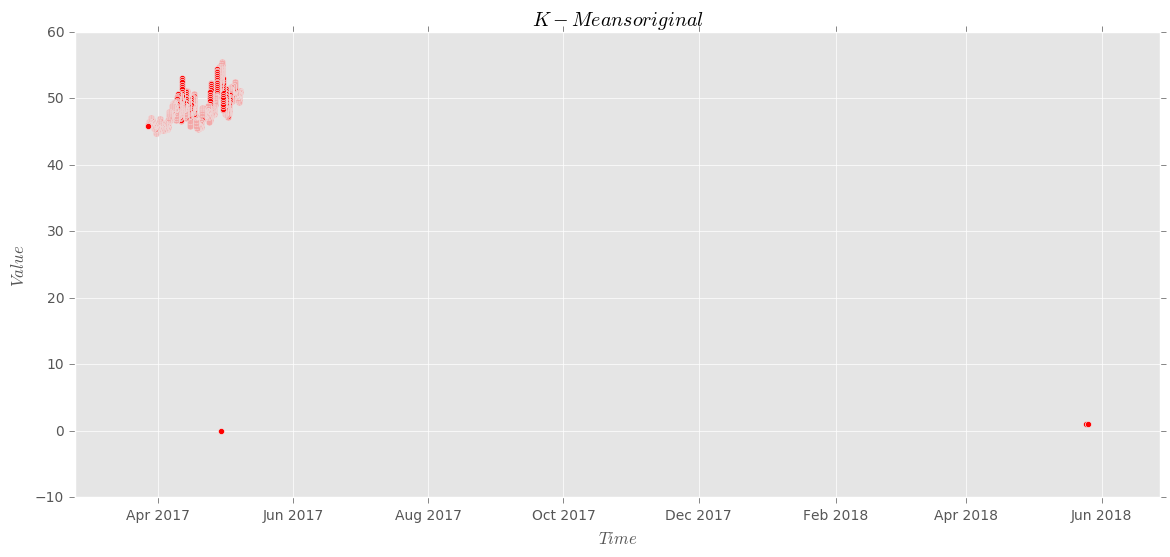

In [68]:
fig, (ax1) = plt.subplots(1, figsize=(14,6))

ax1.scatter(rowDates, rowValues, c="red")
#ax1.scatter(deltaDates, deltaValues, c="green")
#ax1.scatter(deltaDates, posDeltaValues, c="green")


ax1.set_xlabel("$Time$")
ax1.set_ylabel("$Value$")

ax1.set_title("$K-Means original$")
plt.show()

### E-M  original 

k =  2
no optimal cluster found for k =  2
--------
k =  3
no optimal cluster found for k =  3
--------
k =  4
0.25987006496751625 of the observations are in cluster:  0  ==> not less than 0.005
0.33183408295852074 of the observations are in cluster:  1  ==> not less than 0.005
num of data points in cluster 2  :  3        percent:  0.0014992503748125937
[[1998    0]
 [   0    3]]
precision :  1.0
recall    :  1.0
-------------------------------------------------
the Anomaly Cluster is the one which contains  3 observations


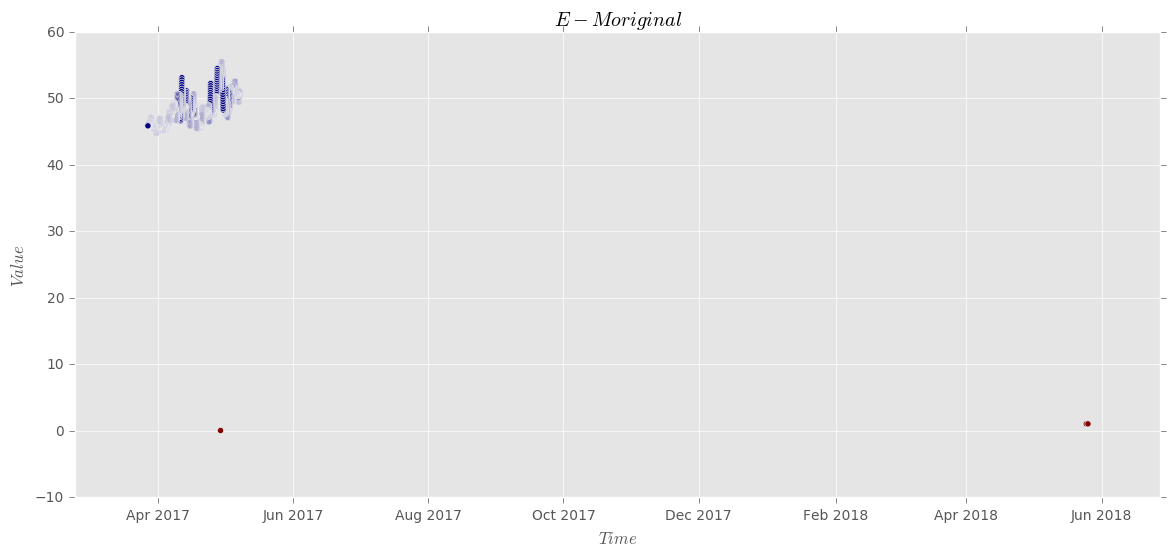

0.40679660169915044 of the observations are in cluster:  3  ==> not less than 0.005
--------


In [70]:
# E-M original finished

distortions = []
varDelta = []
K = range(2,9)
K_delta = range(K[0]+1,K[len(K)-1]+1)

values = np.asarray(rowValues).reshape(-1, 1)
dates = np.asarray(rowDates)
outlierList = outlier
datesDisplay = rowDates.copy()
valuesDisplay = rowValues.copy()
del datesDisplay[0]
del valuesDisplay[0]

counter = 0    
for k in K:
    print("k = ", k)
    gmix = mixture.GaussianMixture(n_components=k, covariance_type='full')
    gmix.fit(values)
    distortions.append(sum(np.min(cdist(values.reshape(-1, 1), gmix.means_, 'euclidean'), axis=1)) / values.shape[0])     
    varDelta = getVarianceDelta(distortions)
    
    if(optimalFound(varDelta, k)):
        found = optimalFound(varDelta, k)
        labels = gmix.predict(values)
        labelsNew = list(labels) 
        counts = []
        outlierValuesPredictedCluster = []
        
        
        for cluster in range(0,k):
            counter = 0
            outlierValuesPredicted = []
            for label in (labels):
                if (cluster == label):
                    counter = counter + 1
                    outlierValuesPredicted.append(1)
                else:
                    outlierValuesPredicted.append(0)
                    continue
            counts.append(counter)
            outlierValuesPredictedCluster.append(outlierValuesPredicted)
        
        resultClusters = []
        for count in counts:
            if(count/len(values) < 0.005):
                resultClusters.append(outlierValuesPredictedCluster[counts.index(count)])
                #print("centroids " , ":" , centroids[counts.index(count)])
                print('num of data points in cluster', counts.index(count) ,' : ', counts[counts.index(count)],'       percent: ' ,  counts[counts.index(count)]/len(values)) 
                cm = confusion_matrix(outlierList, outlierValuesPredictedCluster[counts.index(count)])
                print(cm)
                #acc = calculateAccuracy(cm)
                #err = calculateError(cm)
                precision = calculatePrecision(cm)
                recall = calculateRecall(cm)
                print("precision : ", precision)
                print("recall    : " ,recall)
                #print("Accuracy : ", acc)
                #print("Error    : " ,err)
                print("-------------------------------------------------")
                print("the Anomaly Cluster is the one which contains ", count, "observations")
                plotTheclusteredData(dates, values, np.asarray(outlierValuesPredictedCluster[counts.index(count)]))
                counts.index(count)
            else:
                print(count/len(values),"of the observations are in cluster: ",counts.index(count), " ==> not less than 0.005")
                continue
        
        if(len(resultClusters)>1):
            print("all the found clusters merged together")
            merged = mergeClusters(resultClusters)
            cm = confusion_matrix(outlierList, merged)
            print(cm)
            precision = calculatePrecision(cm)
            recall = calculateRecall(cm)
            print("precision : ", precision)
            print("recall    : " ,recall)
            
            plotTheclusteredData(datesDisplay, valuesDisplay, np.asarray(merged))
        
        print("--------")
        break
    else:
        print("no optimal cluster found for k = ", k)
        print("--------")

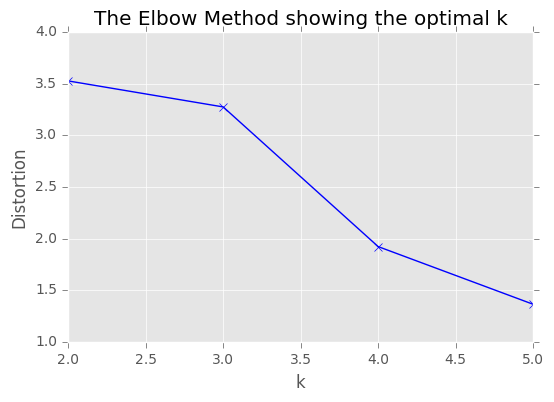

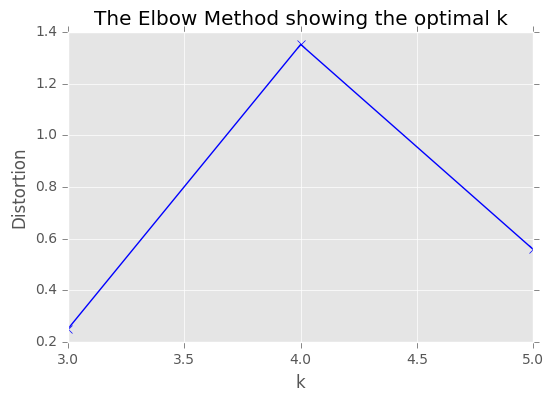

In [56]:
plotTheElbow(range(K[0], k+1), distortions)
plotTheElbow(range(K[1], k+1), varDelta)

In [57]:
### EM-pos-delta

k =  2
no optimal cluster found for k =  2
--------
k =  3
no optimal cluster found for k =  3
--------
k =  4
0.6495 of the observations are in cluster:  0  ==> not less than 0.005
num of data points in cluster 2  :  4        percent:  0.002
[[1994    0]
 [   2    4]]
precision :  1.0
recall    :  0.998997995992
the Anomaly Cluster is the one which contains  4 observations
-------------------------------------------------


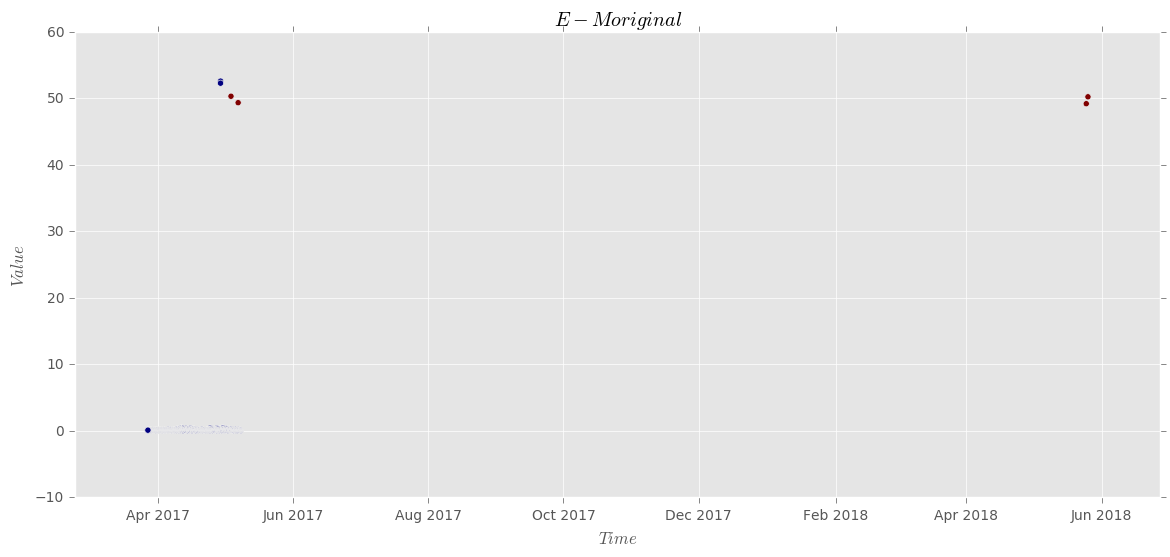

0.3475 of the observations are in cluster:  2  ==> not less than 0.005
num of data points in cluster 2  :  2        percent:  0.001
[[1994    0]
 [   4    2]]
precision :  1.0
recall    :  0.997997997998
the Anomaly Cluster is the one which contains  2 observations
-------------------------------------------------


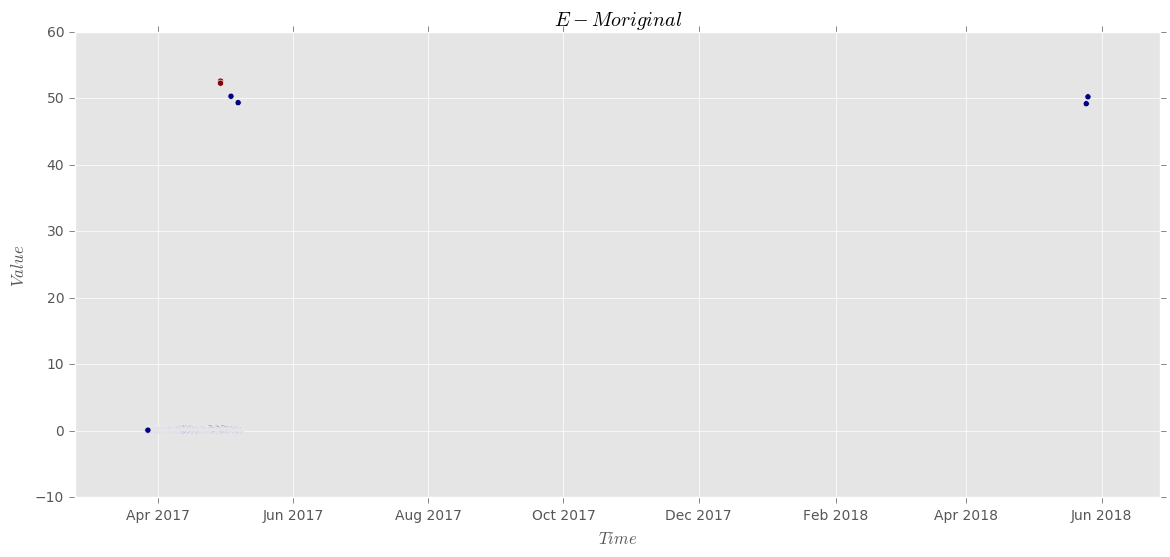

all the found clusters merged together
[[1994    0]
 [   0    6]]
precision :  1.0
recall    :  1.0


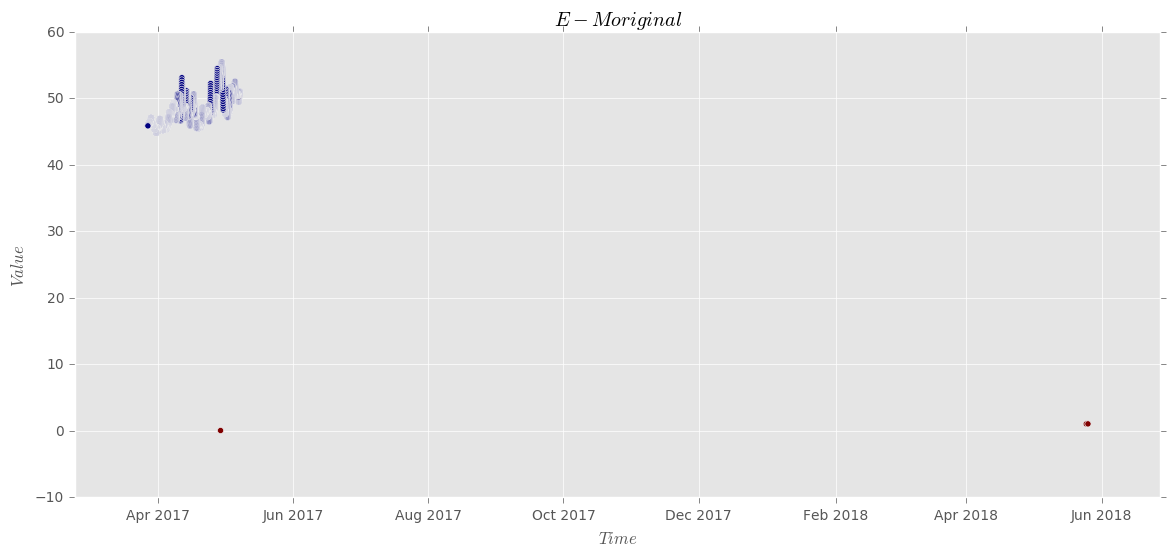

--------


In [71]:
# EM-pos-delta
distortions = []
varDelta = []
K = range(2,9)
K_delta = range(K[0]+1,K[len(K)-1]+1)

values = np.asarray(posDeltaValues).reshape(-1, 1)
dates = np.asarray(deltaDates)
outlierList = outlierPosDelta
datesDisplay = rowDates.copy()
valuesDisplay = rowValues.copy()
del datesDisplay[0]
del valuesDisplay[0]

counter = 0    
for k in K:
    print("k = ", k)
    gmix = mixture.GaussianMixture(n_components=k, covariance_type='full')
    gmix.fit(values)
    distortions.append(sum(np.min(cdist(values.reshape(-1, 1), gmix.means_, 'euclidean'), axis=1)) / values.shape[0])     
    varDelta = getVarianceDelta(distortions)
    
    if(optimalFound(varDelta, k)):
        found = optimalFound(varDelta, k)
        labels = gmix.predict(values)
        labelsNew = list(labels) 
        counts = []
        outlierValuesPredictedCluster = []
        
        
        for cluster in range(0,k):
            counter = 0
            outlierValuesPredicted = []
            for label in (labels):
                if (cluster == label):
                    counter = counter + 1
                    outlierValuesPredicted.append(1)
                else:
                    outlierValuesPredicted.append(0)
                    continue
            counts.append(counter)
            outlierValuesPredictedCluster.append(outlierValuesPredicted)
        
        clusterIndex = -1
        resultClusters = []
        for count in counts:
            clusterIndex = clusterIndex + 1
            if(count/len(values) < 0.005):
                resultClusters.append(outlierValuesPredictedCluster[clusterIndex])
                print('num of data points in cluster', counter ,' : ', counts[clusterIndex],'       percent: ' ,  counts[clusterIndex]/len(values)) 
                #print("centroids " , ":" , centroids[counts.index(count)])
                cm = confusion_matrix(outlierList, outlierValuesPredictedCluster[clusterIndex])
                print(cm)
                #acc = calculateAccuracy(cm)
                #err = calculateError(cm)
                precision = calculatePrecision(cm)
                recall = calculateRecall(cm)
                print("precision : ", precision)
                print("recall    : " ,recall)
                #print("Accuracy : ", acc)
                #print("Error    : " ,err)
                print("the Anomaly Cluster is the one which contains ", count, "observations")

                print("-------------------------------------------------")
                plotTheclusteredData(dates, values, np.asarray(outlierValuesPredictedCluster[clusterIndex]))
            else:
                print(count/len(values),"of the observations are in cluster: ", clusterIndex, " ==> not less than 0.005")
                continue
                
            
        if(len(resultClusters)>1):
            print("all the found clusters merged together")
            merged = mergeClusters(resultClusters)
            cm = confusion_matrix(outlierList, merged)
            print(cm)
            precision = calculatePrecision(cm)
            recall = calculateRecall(cm)
            print("precision : ", precision)
            print("recall    : " ,recall)
            
            plotTheclusteredData(datesDisplay, valuesDisplay, np.asarray(merged))
        
        print("--------")
        break
    else:
        print("no optimal cluster found for k = ", k)
        print("--------")

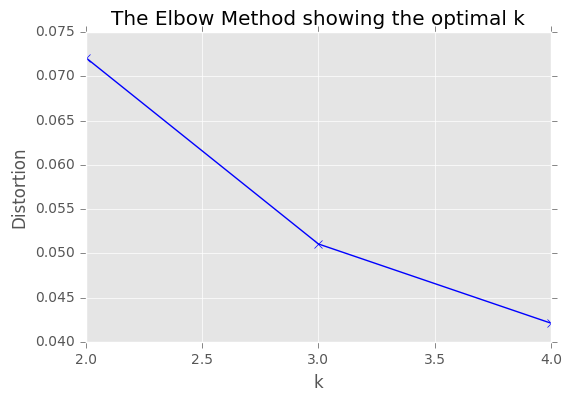

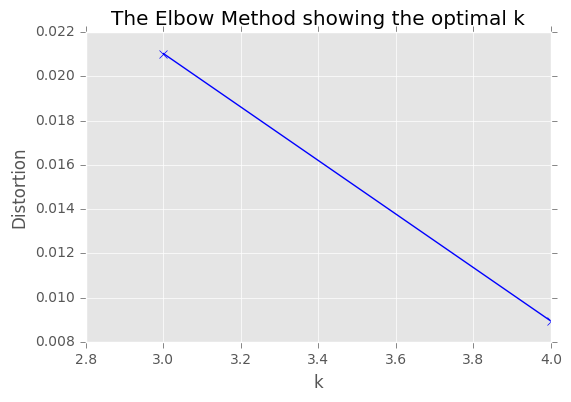

In [59]:
plotTheElbow(range(K[0], k+1), distortions)
plotTheElbow(range(K[1], k+1), varDelta)

K =  2
-------
mean  = [ 62.8732817]
num of data points in cluster 0  :  170124        percent:  0.7174322836936857
[[ 66998 170117]
 [     7      7]]
Accuracy :  0.282567716306
Error    :  0.717432283694
-------------------------------------------------
mean  = [ 24.69520228]
num of data points in cluster 1  :  67005        percent:  0.2825677163063143
[[170117  66998]
 [     7      7]]
Accuracy :  0.717432283694
Error    :  0.282567716306
-------------------------------------------------


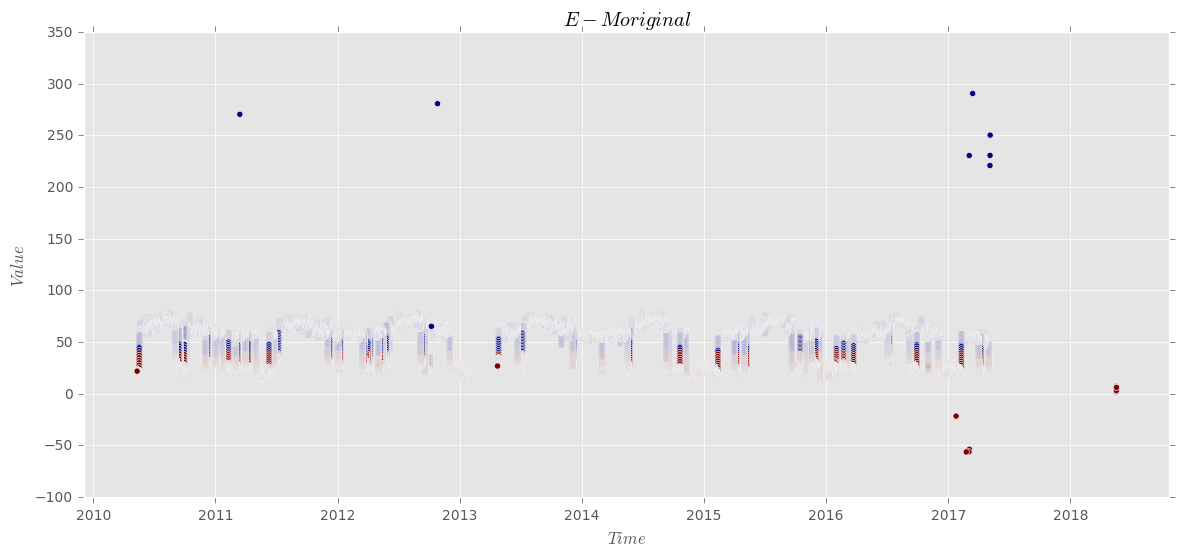

K =  3
-------
mean  = [ 69.45251589]
num of data points in cluster 0  :  61110        percent:  0.2577078299153625
[[176005  61110]
 [    14      0]]
Accuracy :  0.74223313049
Error    :  0.25776686951
-------------------------------------------------
mean  = [ 24.97748739]
num of data points in cluster 1  :  67951        percent:  0.286557106047763
[[169178  67937]
 [     0     14]]
Accuracy :  0.713501933547
Error    :  0.286498066453
-------------------------------------------------
mean  = [ 59.14619771]
num of data points in cluster 2  :  108068        percent:  0.45573506403687447
[[129047 108068]
 [    14      0]]
Accuracy :  0.544205896369
Error    :  0.455794103631
-------------------------------------------------


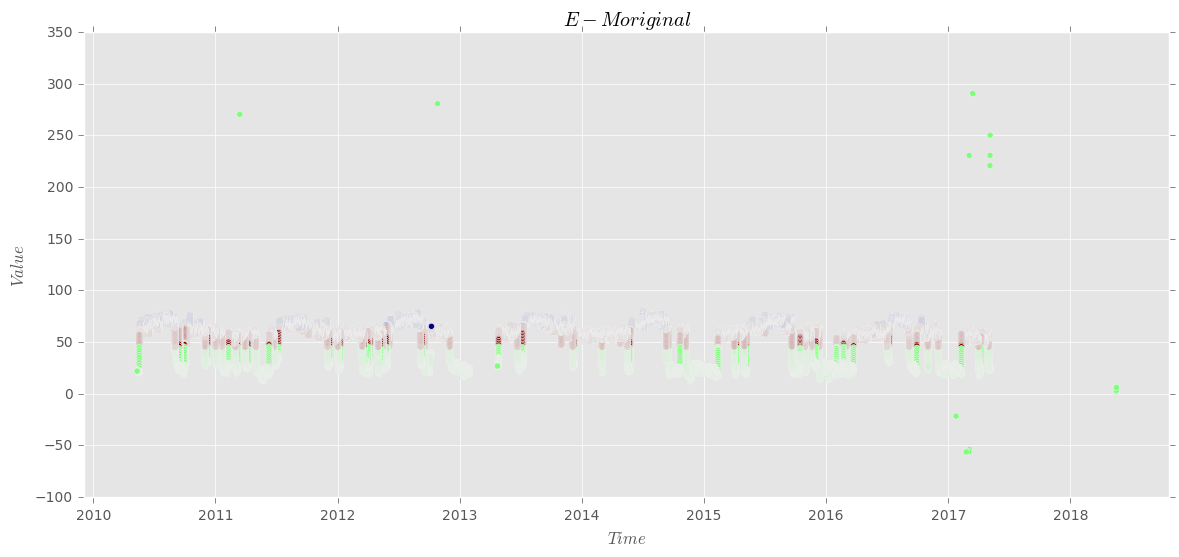

K =  4
-------
mean  = [ 57.21406759]
num of data points in cluster 0  :  52280        percent:  0.22047071425257983
[[184835  52280]
 [    14      0]]
Accuracy :  0.779470246153
Error    :  0.220529753847
-------------------------------------------------
mean  = [ 25.00002216]
num of data points in cluster 1  :  68005        percent:  0.2867848301979092
[[169124  67991]
 [     0     14]]
Accuracy :  0.713274209397
Error    :  0.286725790603
-------------------------------------------------
mean  = [ 61.55635402]
num of data points in cluster 2  :  62090        percent:  0.26184060152912547
[[175025  62090]
 [    14      0]]
Accuracy :  0.738100358876
Error    :  0.261899641124
-------------------------------------------------
mean  = [ 70.19096122]
num of data points in cluster 3  :  54754        percent:  0.23090385402038552
[[182361  54754]
 [    14      0]]
Accuracy :  0.769037106385
Error    :  0.230962893615
-------------------------------------------------


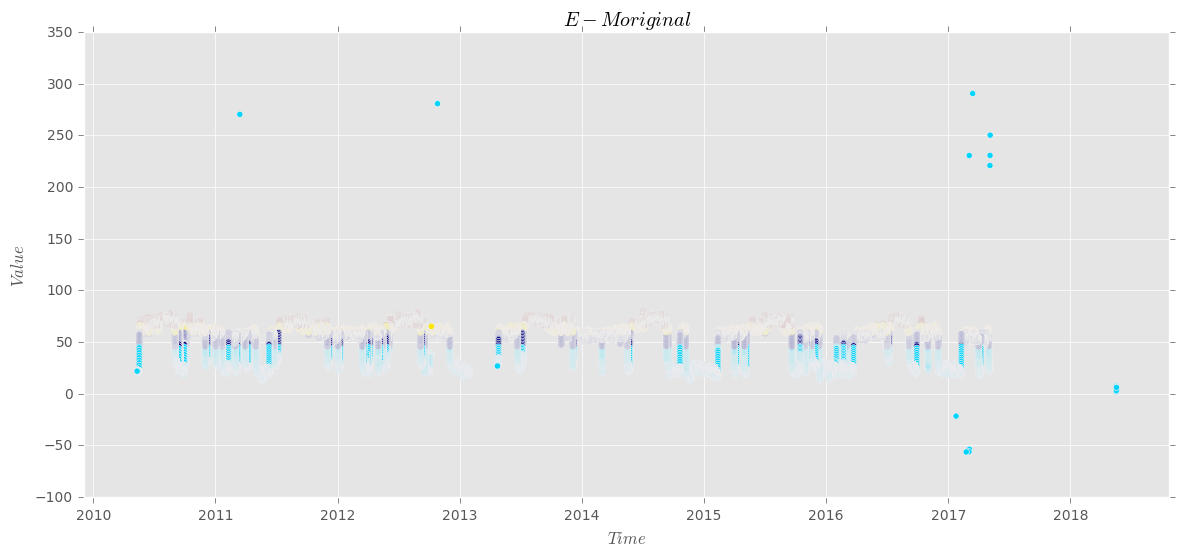

K =  5
-------
mean  = [ 61.7323009]
num of data points in cluster 0  :  55191        percent:  0.2327467327910125
[[181924  55191]
 [    14      0]]
Accuracy :  0.767194227615
Error    :  0.232805772385
-------------------------------------------------
mean  = [ 23.95881819]
num of data points in cluster 1  :  61455        percent:  0.25916273420796276
[[175660  61455]
 [    14      0]]
Accuracy :  0.740778226198
Error    :  0.259221773802
-------------------------------------------------
mean  = [ 70.16156174]
num of data points in cluster 2  :  54794        percent:  0.2310725385760493
[[182321  54794]
 [    14      0]]
Accuracy :  0.768868421829
Error    :  0.231131578171
-------------------------------------------------
mean  = [ 57.54013282]
num of data points in cluster 3  :  58150        percent:  0.2452251727962417
[[178965  58150]
 [    14      0]]
Accuracy :  0.754715787609
Error    :  0.245284212391
-------------------------------------------------
mean  = [ 31.53445644]
nu

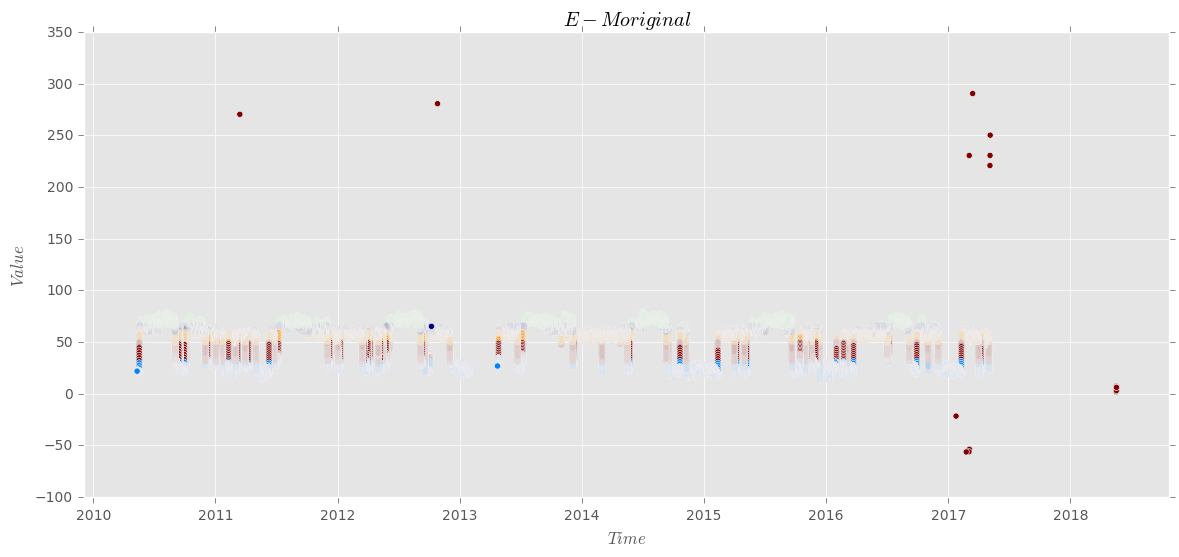

K =  6
-------
mean  = [ 57.55779869]
num of data points in cluster 0  :  60883        percent:  0.2567505450619705
[[176232  60883]
 [    14      0]]
Accuracy :  0.743190415344
Error    :  0.256809584656
-------------------------------------------------
mean  = [ 26.5644857]
num of data points in cluster 1  :  27962        percent:  0.11791893863677576
[[209153  27962]
 [    14      0]]
Accuracy :  0.882022021769
Error    :  0.117977978231
-------------------------------------------------
mean  = [ 70.32039381]
num of data points in cluster 2  :  53154        percent:  0.22415647179383374
[[183961  53154]
 [    14      0]]
Accuracy :  0.775784488612
Error    :  0.224215511388
-------------------------------------------------
mean  = [ 62.109432]
num of data points in cluster 3  :  53827        percent:  0.2269945894428771
[[183288  53827]
 [    14      0]]
Accuracy :  0.772946370963
Error    :  0.227053629037
-------------------------------------------------
mean  = [ 37.19762769]
num

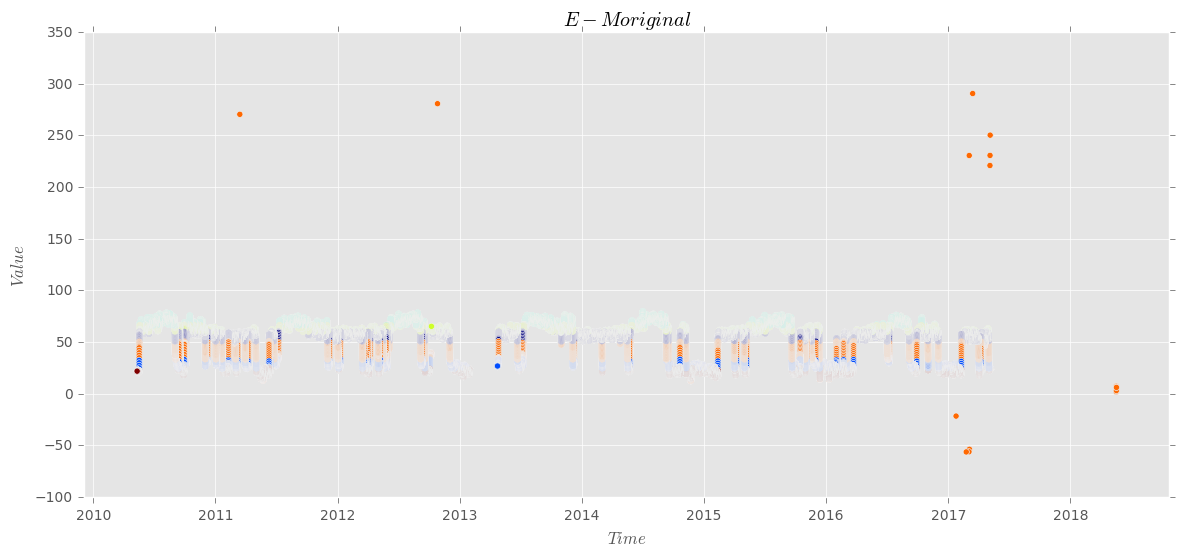

K =  7
-------
mean  = [ 60.11273696]
num of data points in cluster 0  :  59820        percent:  0.25226775299520515
[[177295  59820]
 [    14      0]]
Accuracy :  0.74767320741
Error    :  0.25232679259
-------------------------------------------------
mean  = [ 21.95864082]
num of data points in cluster 1  :  33707        percent:  0.1421462579439883
[[203408  33707]
 [    14      0]]
Accuracy :  0.857794702462
Error    :  0.142205297538
-------------------------------------------------
mean  = [ 70.9602511]
num of data points in cluster 2  :  46130        percent:  0.19453546381927136
[[190985  46130]
 [    14      0]]
Accuracy :  0.805405496586
Error    :  0.194594503414
-------------------------------------------------
mean  = [ 64.95367994]
num of data points in cluster 3  :  28002        percent:  0.11808762319243955
[[209113  28002]
 [    14      0]]
Accuracy :  0.881853337213
Error    :  0.118146662787
-------------------------------------------------
mean  = [ 36.38201434]
nu

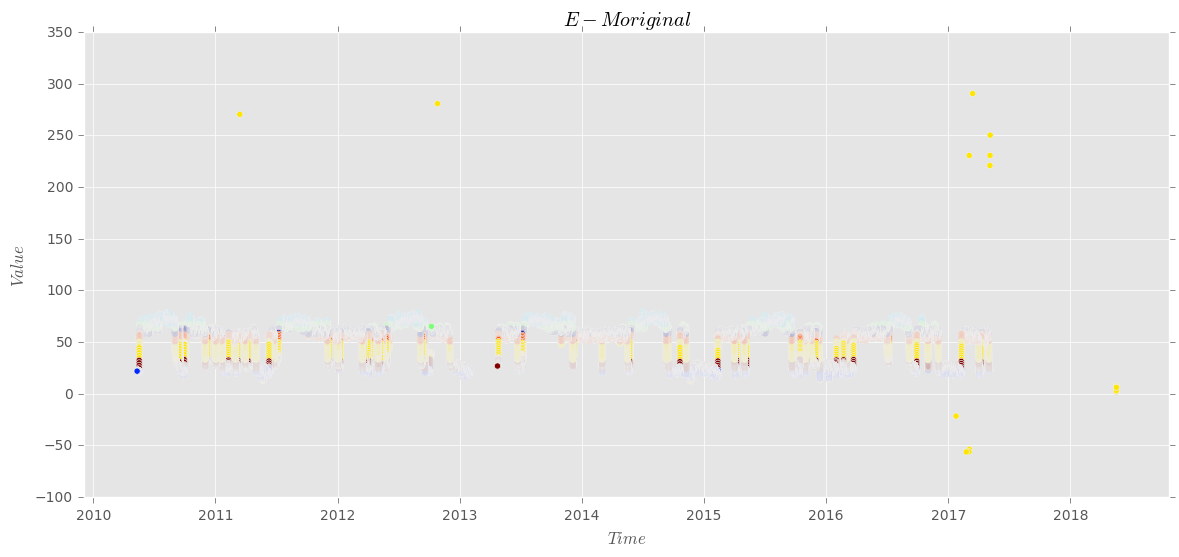

K =  8
-------
mean  = [ 22.06700966]
num of data points in cluster 0  :  34764        percent:  0.14660374732740408
[[202351  34764]
 [    14      0]]
Accuracy :  0.853337213078
Error    :  0.146662786922
-------------------------------------------------
mean  = [ 59.65201349]
num of data points in cluster 1  :  58077        percent:  0.24491732348215528
[[179038  58077]
 [    14      0]]
Accuracy :  0.755023636923
Error    :  0.244976363077
-------------------------------------------------
mean  = [ 71.63239711]
num of data points in cluster 2  :  33130        percent:  0.13971298322853806
[[203985  33130]
 [    14      0]]
Accuracy :  0.860227977177
Error    :  0.139772022823
-------------------------------------------------
mean  = [ 26.44265602]
num of data points in cluster 3  :  28722        percent:  0.12112394519438786
[[208393  28722]
 [    14      0]]
Accuracy :  0.878817015211
Error    :  0.121182984789
-------------------------------------------------
mean  = [ 63.86000902

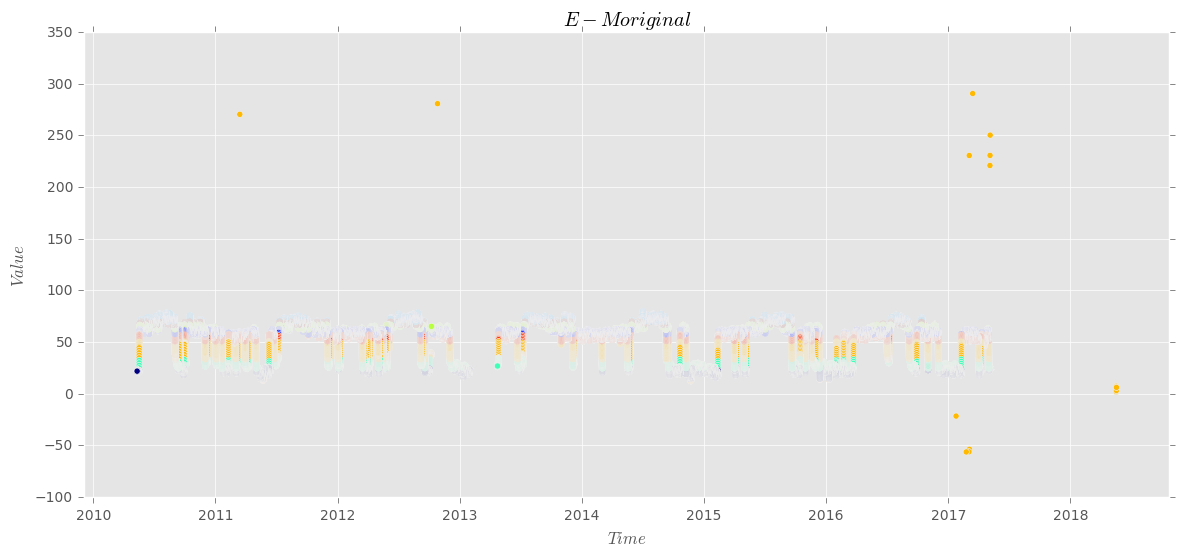

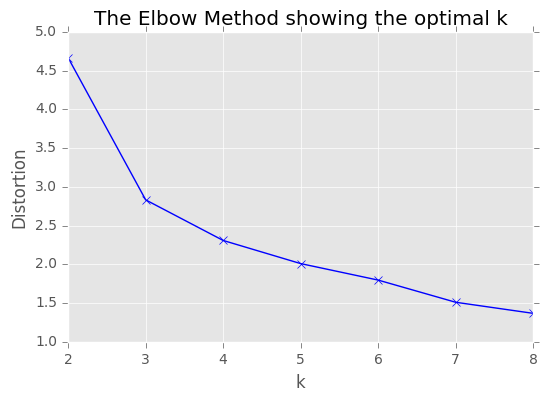

In [50]:
values = np.asarray(rowValues).reshape(-1, 1)
dates = np.asarray(rowDates)
distortions = []

K = range(2,9)
for k in K:
    print("K = ", k)
    print("-------")
    gmix = mixture.GaussianMixture(n_components=k, covariance_type='full')
    gmix.fit(values)
    distortions.append(sum(np.min(cdist(values.reshape(-1, 1), gmix.means_, 'euclidean'), axis=1)) / values.shape[0])     

    means = list(gmix.means_)
    
    predicted = gmix.predict(values)
    counts = []
    outlierValuesPredictedCluster = []
    
    for cluster in range(0,k):
            counter = 0
            outlierValuesPredicted = []

            for label in (predicted):
                if (cluster == label):
                    counter = counter+1
                    outlierValuesPredicted.append(1)
                else:
                    outlierValuesPredicted.append(0)
                    continue
            counts.append(counter)
            outlierValuesPredictedCluster.append(outlierValuesPredicted)


    for i in range(len(counts)):
        print("mean " , "=" , means[i])
        print('num of data points in cluster', i ,' : ', counts[i],'       percent: ' ,  counts[i]/len(rowValues) ) 
        cm = confusion_matrix(outlier, outlierValuesPredictedCluster[i])
        print(cm)
        acc = calculateAccuracy(cm)
        err = calculateError(cm)
        print("Accuracy : ", acc)
        print("Error    : " ,err)
        print("-------------------------------------------------")

    plotTheclusteredData(rowDates, rowValues, predicted)

    #for x in range(0, k):
        #plotTheDataWithoutClusters(x, predicted, rowValues, rowDates, titel='expectation-maximization - Original without ' + str(x) )
plotTheElbow(K, distortions)


### EM - Delta

K =  2
-------
mean  = [ 0.00169767]
num of data points in cluster 0  :  232217        percent:  0.979285536564486
[[  4879 232217]
 [    32      0]]
-------------------------------------------------
mean  = [-0.07838565]
num of data points in cluster 1  :  4911        percent:  0.020710246321622407
[[232217   4879]
 [     0     32]]
-------------------------------------------------
237129
237129
237128


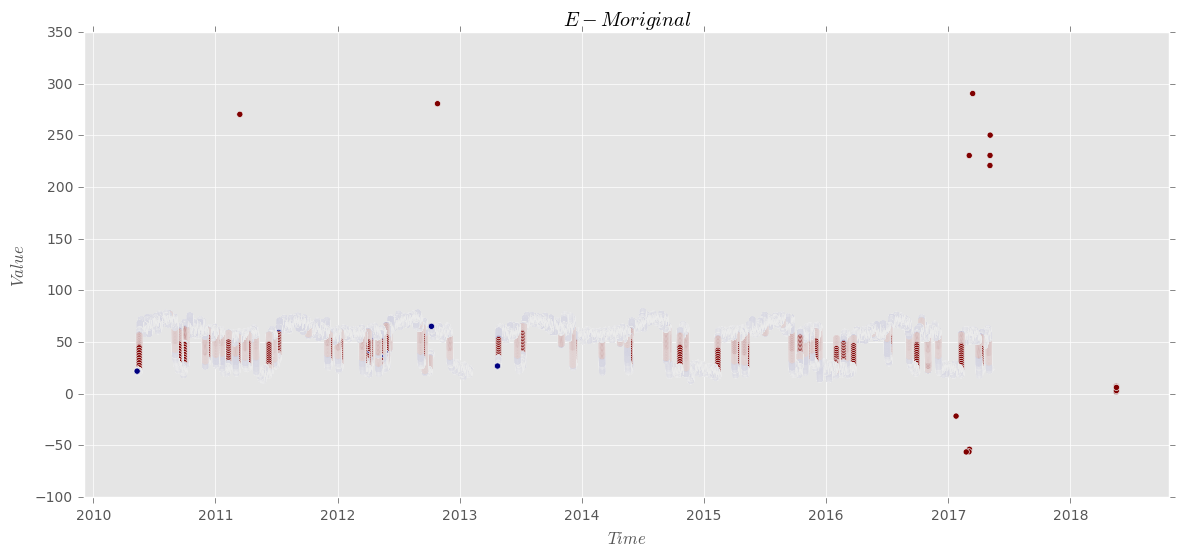

K =  3
-------
mean  = [ 0.00093037]
num of data points in cluster 0  :  229092        percent:  0.9661070556532521
[[  8004 229092]
 [    32      0]]
-------------------------------------------------
mean  = [-1.57619116]
num of data points in cluster 1  :  161        percent:  0.0006789553365467741
[[236967    129]
 [     0     32]]
-------------------------------------------------
mean  = [-0.00190586]
num of data points in cluster 2  :  7875        percent:  0.0332097718963096
[[229221   7875]
 [    32      0]]
-------------------------------------------------
237129
237129
237128


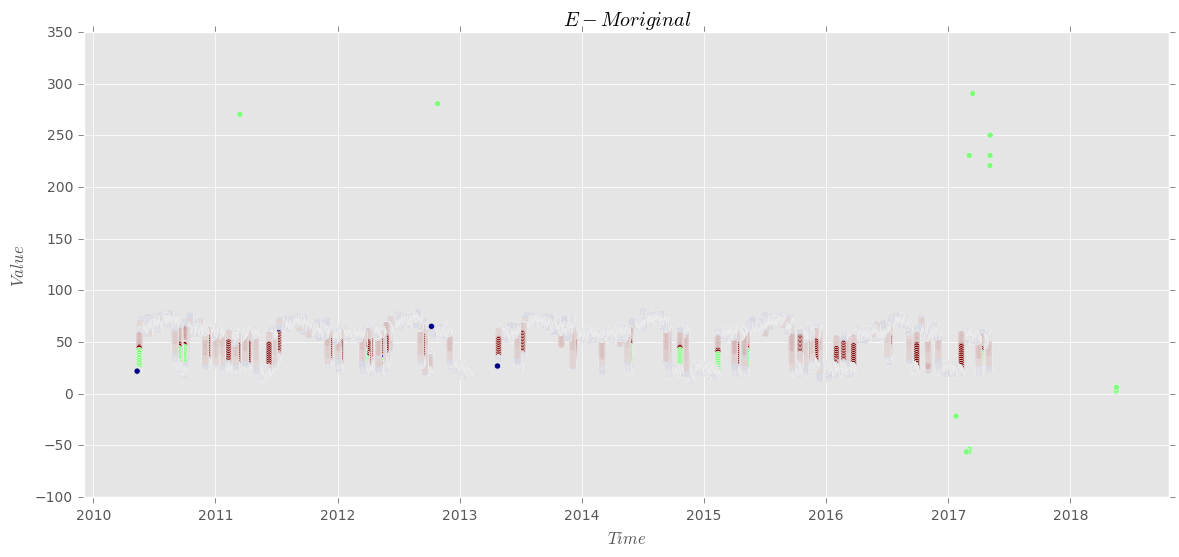

K =  4
-------
mean  = [ 0.00093675]
num of data points in cluster 0  :  229154        percent:  0.966368516714531
[[  7942 229154]
 [    32      0]]
-------------------------------------------------
mean  = [ 10.08864735]
num of data points in cluster 1  :  155        percent:  0.0006536526531972049
[[236967    129]
 [     6     26]]
-------------------------------------------------
mean  = [-217.32289134]
num of data points in cluster 2  :  6        percent:  2.530268334956922e-05
[[237096      0]
 [    26      6]]
-------------------------------------------------
mean  = [-0.00437194]
num of data points in cluster 3  :  7813        percent:  0.03294831083503072
[[229283   7813]
 [    32      0]]
-------------------------------------------------
237129
237129
237128


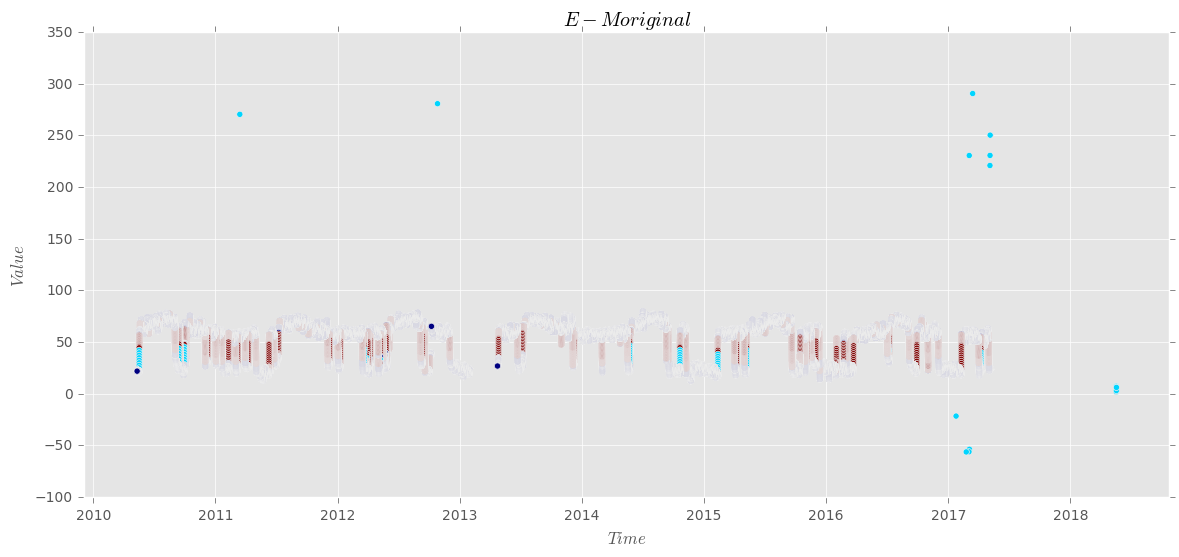

K =  5
-------
mean  = [ 0.0002086]
num of data points in cluster 0  :  226401        percent:  0.9547588021709702
[[ 10695 226401]
 [    32      0]]
-------------------------------------------------
mean  = [-81.21398823]
num of data points in cluster 1  :  22        percent:  9.277650561508715e-05
[[237090      6]
 [    16     16]]
-------------------------------------------------
mean  = [ 83.41694345]
num of data points in cluster 2  :  22        percent:  9.277650561508715e-05
[[237090      6]
 [    16     16]]
-------------------------------------------------
mean  = [-1.31059832]
num of data points in cluster 3  :  704        percent:  0.0029688481796827887
[[236392    704]
 [    32      0]]
-------------------------------------------------
mean  = [ 0.0715757]
num of data points in cluster 4  :  9979        percent:  0.042082579524225214
[[227117   9979]
 [    32      0]]
-------------------------------------------------
237129
237129
237128


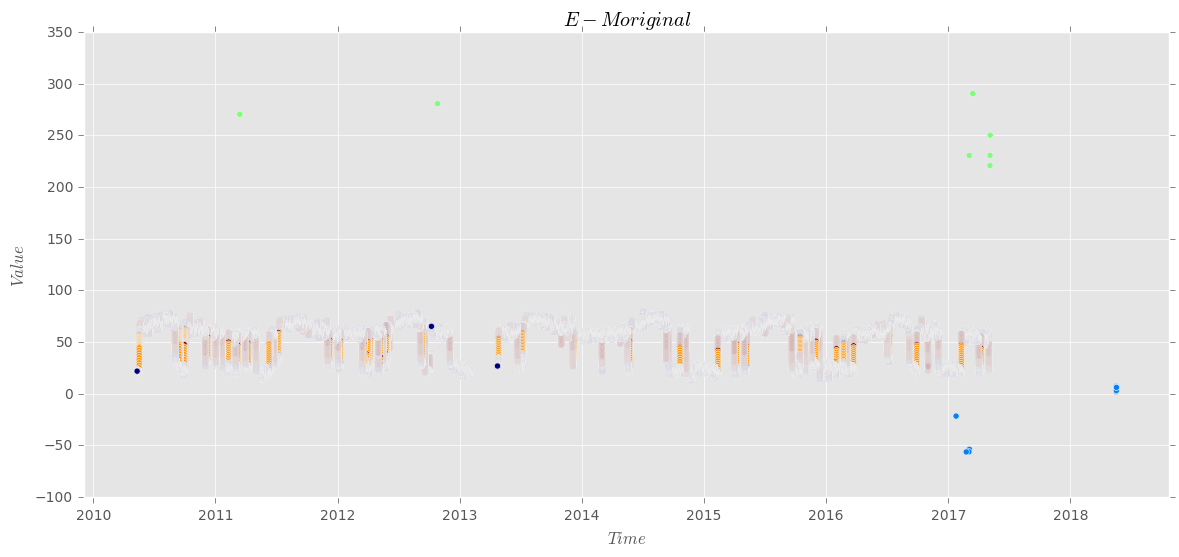

K =  6
-------
mean  = [ 0.0001781]
num of data points in cluster 0  :  226223        percent:  0.9540081558982664
[[ 10873 226223]
 [    32      0]]
-------------------------------------------------
mean  = [ 214.05824404]
num of data points in cluster 1  :  6        percent:  2.530268334956922e-05
[[237096      0]
 [    26      6]]
-------------------------------------------------
mean  = [-44.85688376]
num of data points in cluster 2  :  35        percent:  0.00014759898620582046
[[237084     12]
 [     9     23]]
-------------------------------------------------
mean  = [-1.46236343]
num of data points in cluster 3  :  676        percent:  0.002850768990718132
[[236420    676]
 [    32      0]]
-------------------------------------------------
mean  = [ 0.06674483]
num of data points in cluster 4  :  10185        percent:  0.04295130498589375
[[226911  10185]
 [    32      0]]
-------------------------------------------------
mean  = [ 111.23519087]
num of data points in cluster 5 

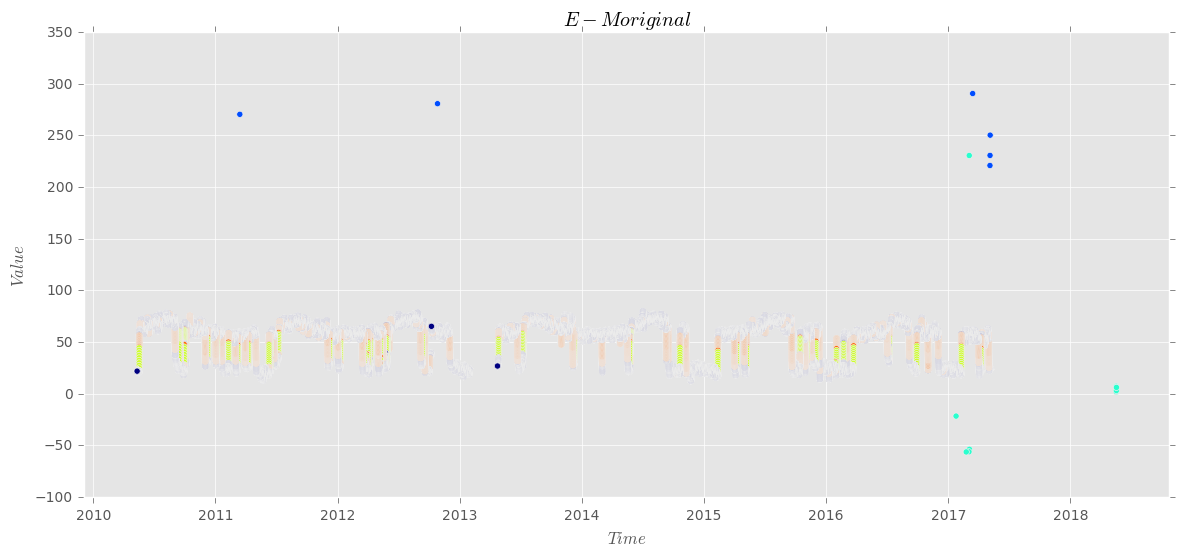

K =  7
-------
mean  = [ 0.00092388]
num of data points in cluster 0  :  229091        percent:  0.9661028385393604
[[  8005 229091]
 [    32      0]]
-------------------------------------------------
mean  = [ 17.61980145]
num of data points in cluster 1  :  151        percent:  0.0006367841976308254
[[236967    129]
 [    10     22]]
-------------------------------------------------
mean  = [-212.47734379]
num of data points in cluster 2  :  7        percent:  2.9519797241164093e-05
[[237096      0]
 [    25      7]]
-------------------------------------------------
mean  = [-0.00323551]
num of data points in cluster 3  :  7876        percent:  0.0332139890102012
[[229220   7876]
 [    32      0]]
-------------------------------------------------
mean  = [-111.28606375]
num of data points in cluster 4  :  3        percent:  1.265134167478461e-05
[[237096      0]
 [    29      3]]
-------------------------------------------------
mean  = [-57.20017254]
num of data points in cluster 5 

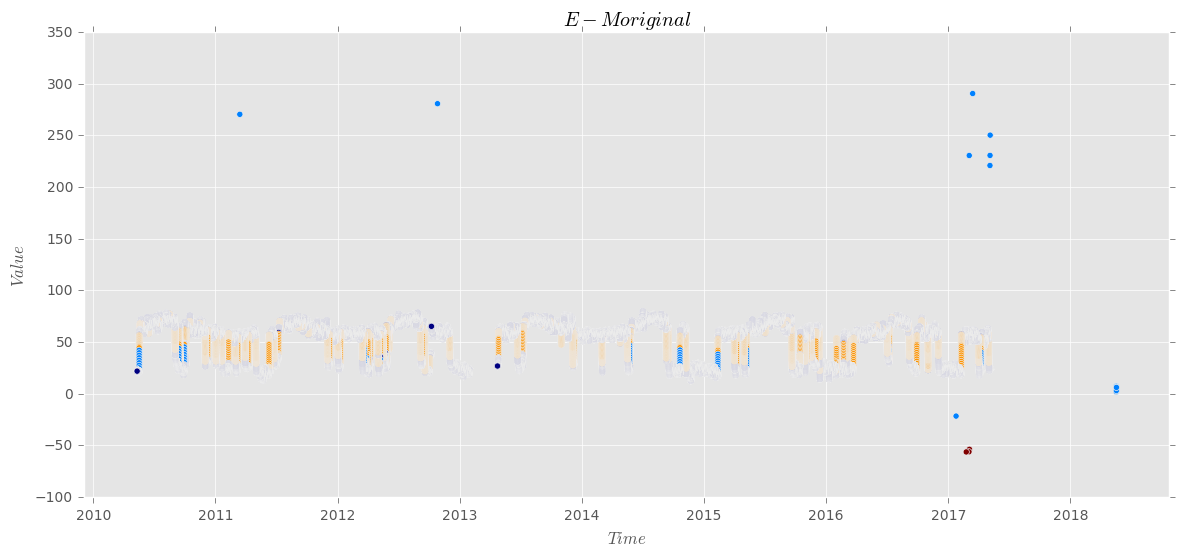

K =  8
-------
mean  = [ 0.00091749]
num of data points in cluster 0  :  228995        percent:  0.9656979956057673
[[  8101 228995]
 [    32      0]]
-------------------------------------------------
mean  = [-198.04317052]
num of data points in cluster 1  :  3        percent:  1.265134167478461e-05
[[237096      0]
 [    29      3]]
-------------------------------------------------
mean  = [ 211.27746736]
num of data points in cluster 2  :  7        percent:  2.9519797241164093e-05
[[237096      0]
 [    25      7]]
-------------------------------------------------
mean  = [-6.1068794]
num of data points in cluster 3  :  280        percent:  0.0011807918896465637
[[236828    268]
 [    20     12]]
-------------------------------------------------
mean  = [ 7.45431734]
num of data points in cluster 4  :  3        percent:  1.265134167478461e-05
[[237096      0]
 [    29      3]]
-------------------------------------------------
mean  = [ 111.07378804]
num of data points in cluster 5  

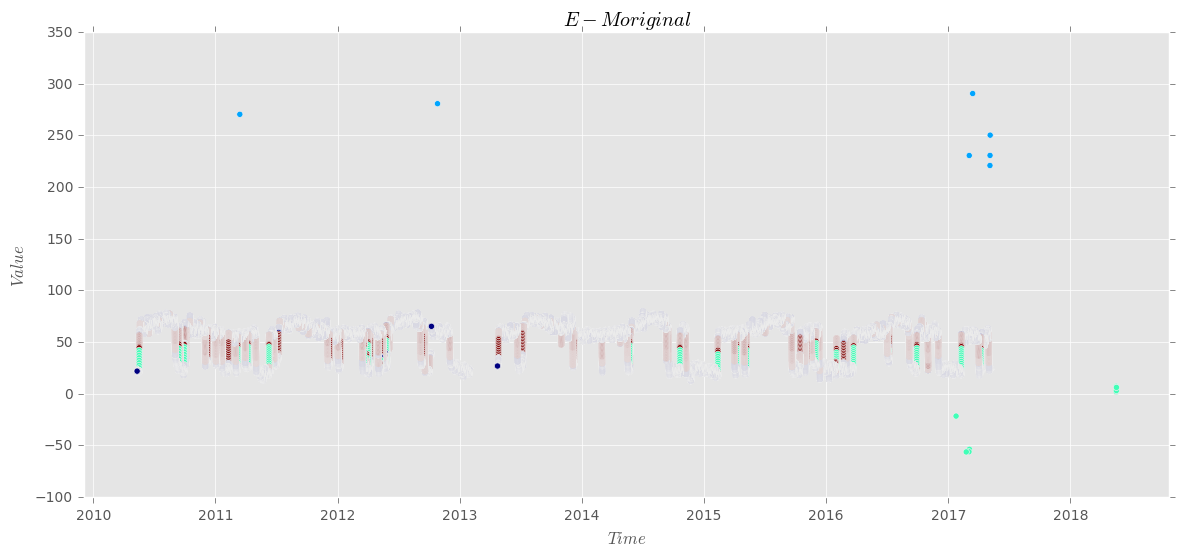

In [57]:
values = np.asarray(deltaValues).reshape(-1, 1)
dates = np.asarray(deltaDates)

rowValuesNew = rowValues.copy()
rowDatesNew = rowDates.copy()

del rowValuesNew[0]
del rowDatesNew[0]

K = range(2,9)
for k in K:
    print("K = ", k)
    print("-------")
    gmix = mixture.GaussianMixture(n_components=k, covariance_type='full')
    gmix.fit(values)
    means = list(gmix.means_)
    
    predicted = gmix.predict(values)
    counts = []
    outlierValuesPredictedCluster = []
    
    for cluster in range(0,k):
            counter = 0
            outlierValuesPredicted = []

            for label in (predicted):
                if (cluster == label):
                    counter = counter+1
                    outlierValuesPredicted.append(1)
                else:
                    outlierValuesPredicted.append(0)
                    continue
            counts.append(counter)
            outlierValuesPredictedCluster.append(outlierValuesPredicted)


    for i in range(len(counts)):
        print("mean " , "=" , means[i])
        print('num of data points in cluster', i ,' : ', counts[i],'       percent: ' ,  counts[i]/len(rowValues) ) 
        print(confusion_matrix(outlierPosDelta, outlierValuesPredictedCluster[i]))
        print("-------------------------------------------------")

    print(len(rowDates))
    print(len(rowValues))
    print(len(predicted))
    plotTheclusteredData(rowDatesNew, rowValuesNew, predicted)

    #for x in range(0, k):
        #plotTheDataWithoutClusters(x, predicted, rowValuesNew, rowDatesNew, titel='expectation-maximization - Original without ' + str(x) )



### EM - Delta

In [ ]:
values = np.asarray(posDeltaValues).reshape(-1, 1)
dates = np.asarray(deltaDates)

rowValuesNew = rowValues.copy()
rowDatesNew = rowDates.copy()

del rowValuesNew[0]
del rowDatesNew[0]

K = range(10,15)
for k in K:
    print("K = ", k)
    print("-------")
    gmix = mixture.GaussianMixture(n_components=k, covariance_type='full')
    gmix.fit(values)
    means = list(gmix.means_)
    
    predicted = gmix.predict(values)
    counts = []
    outlierValuesPredictedCluster = []
    
    for cluster in range(0,k):
            counter = 0
            outlierValuesPredicted = []

            for label in (predicted):
                if (cluster == label):
                    counter = counter+1
                    outlierValuesPredicted.append(1)
                else:
                    outlierValuesPredicted.append(0)
                    continue
            counts.append(counter)
            outlierValuesPredictedCluster.append(outlierValuesPredicted)


    for i in range(len(counts)):
        print("mean " , "=" , means[i])
        print('num of data points in cluster', i ,' : ', counts[i],'       percent: ' ,  counts[i]/len(rowValues) ) 
        print(confusion_matrix(outlierPosDelta, outlierValuesPredictedCluster[i]))
        print("-------------------------------------------------")


    plotTheclusteredData(rowDatesNew, rowValuesNew, predicted, titel="$E-M original$")

    #for x in range(0, k):
        #plotTheDataWithoutClusters(x, predicted, rowValuesNew, rowDatesNew, titel='expectation-maximization - Original without ' + str(x) )
